   ![CNCA](http://localhost:8888/files/Prueba.png "Logo del CNCA")
   # Guía de uso de Scikit Image
   > Keilyn Andreina Garro Vargas

# 1
# Introducción

Las imágenes son en general una gran fuente de datos. Sin embargo para obtener la información de estas es necesario en muchas ocasiones aplicar ciertas acciones u operaciones, a lo que se le llama el procesamiento de imágenes. Dentro del procesamiento digital de señales se encuentran las siguientes áreas:

> - **Adquisición:** La adquisición es el proceso mediante el cual se obtiene una imagen.

> - **Preprocesamiento:** Consiste en la aplicación de técnicas para al reducción del ruido y el realce de detalles.

> - **Segmentación:** Consiste en dividir una imagen en objetos de interés.

> - **Reconocimiento y descripción:** El procesamiento de descripción permite obtener características como el área, perímetro, tamaño, entre otras que hace más fácil el proceso de diferenciar un objeto de otro.

Python cuenta con una biblioteca dedicada al procesamiento de imágenes: Scikit-Image. Esta contiene una serie algoritmos que se pueden utilizar en investigación, educación y aplicaciones industriales.

Es importante mencionar que Scikit-Image trabaja en conjunto con otras bibliotecas de Python, como Numpy y Scipy, lo que permite un ambiente de programación bastante amigable. 

El presente documento muestra una guía detallada de cómo usar Scikit-Image en diferentes aplicaciones de procesamiento de imágenes con el fin de facilitar la tarea al programador.



# 2
# Operaciones básicas

## ¿Cómo cargar las imágenes?

Las imágenes a procesar pueden estar en un directorio, en internet, incluso puede ser una imagen de muestra de las que ofrece la biblioteca.

A continuación se muestran las líneas de código necesarias para leer las imágenes mediante las diferentes modalidades.

- Desde un directorio
> Para acceder a la imagen se debe tener la ruta de esta. El módulo os.path puede resultar muy práctico ya que posee diferentes funciones que permiten escribir de forma más rápida la dirección. Por ejemplo la función os.path.join permite unir diferentes componentes de la ruta inteligentemente. Por otra parte si la imagen se encuentra en el mismo directorio que el archivo de código se puede utilizar la función os.getcwd() para obtener la dirección actual.

In [27]:
import os
from skimage import io

filename = os.path.join(os.getcwd(), 'Checkerboard.png')
image=io.imread(filename)

- Desde internet
> La biblioteca Scikit-image permite leer imágenes desde internet por medio de la función io.imread conociendo la dirección URL, como se muestra en el código a continuación.

In [6]:
from skimage import io

image=io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Checkerboard_pattern.svg/1024px-Checkerboard_pattern.svg.png')

- Una imagen de muestra
> La biblioteca cuenta con el módulo data, el cual permite utilizar imágenes de prueba. Estas se pueden importar de la forma que se muestra en el siguiente código.

In [7]:
from skimage import data

image = data.rocket()

## ¿Cómo visualizar las imágenes?

### Visualización básica

Para visualizar las imágenes es conveniente utilizar la colección de comandos Matplotlib.pyplot, la cual permite que Matplotlib trabaje como Matlab. Esto hace que la manipulación de las imágenes sea mucho más sencilla e interactiva, por ejemplo se pueden visualizar las imágenes, graficar áreas sobre una imagen, incluir títulos, manipular los ejes entre otras cosas.

Para mostrar una imagen en consola se utiliza la función plt.imshow(). Si se quiere visualizar más de una imagen a la vez, estas se deben instanciar utilizando la función plt.figure() como se muestra en el código.

<IPython.core.display.Javascript object>


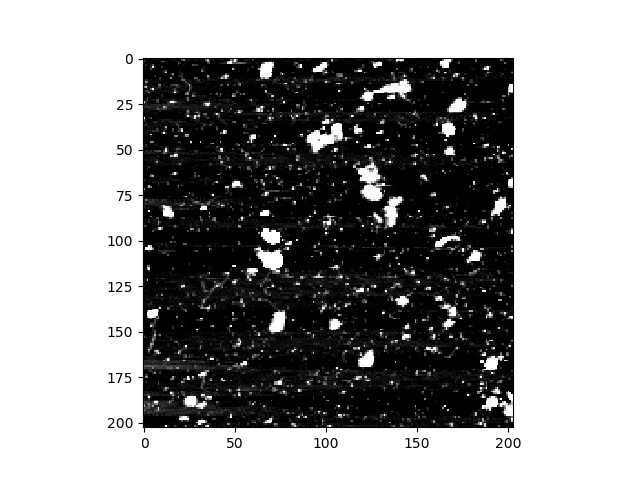

In [8]:
%matplotlib notebook

#Se importan los paquetes necesarios
import os
import matplotlib.pyplot as plt
from skimage import io

#Se lee la imagen
filename = os.path.join(os.getcwd(), 'Particulas.TIF')
image=io.imread(filename)

#Se grafica la imagen
plt.figure() 
plt.imshow(image, cmap='gray')

Matplotlib.pyplot cuenta con algunas funciones que permiten caracterizar una imagen fácilmente. En el código que se muestra a continuación se muestran algunas funciones que permiten poner título a la imagen, nombrar los ejes, incluir texto, señalar un punto importante, así como cambiar el tamaño de fuente y color del texto que se utiliza.

<IPython.core.display.Javascript object>


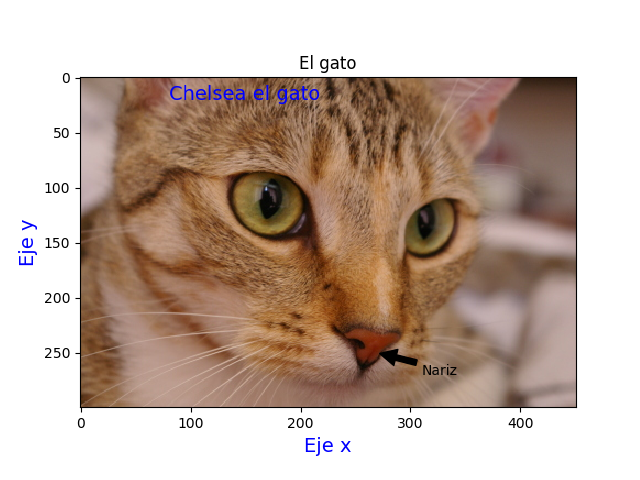

In [9]:
%matplotlib notebook

#Se importan los paquetes necesarios
import matplotlib.pyplot as plt
from skimage import data

#Se carga la imagen 
image=data.chelsea()

#Se grafica la figura con sus caracteristicas
plt.figure()
plt.imshow(image, cmap='gray')
plt.xlabel('Eje x', fontsize=14, color='blue')
plt.ylabel('Eje y', fontsize=14, color='blue')
plt.title('El gato')
plt.text(80, 20,'Chelsea el gato', fontsize=14, color='blue')
plt.annotate('Nariz', xy=(270, 250), xytext=(310, 270),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
#plt.axis([100, 250, 150, 50])

### Visualización interactiva

Skimage-viewer puede ser utilizado para visualizar imágenes en una nueva ventana como se muestra en el siguiente código. Sin embargo, su principal objetivo es crear fácilmente editores de imágenes interactivos.

In [10]:
%matplotlib notebook
import os
from skimage import viewer
from skimage import io

filename = os.path.join(os.getcwd(), 'Particulas.TIF')
image=io.imread(filename)

new_viewer = viewer.ImageViewer(image)
new_viewer.show()

[]

La principal ventaja que tiene Skimage-viewer es que se le pueden añadir fácilmente pluggins para manipular imágenes. Aunque actualmente hay muy pocos plugins implementados, estos se pueden escribir de manera sencilla. Seguidamente se muestra el código haciendo uso de un plugin ya implementado y el código para la implementación de un plugin propio.

In [11]:
import os
from skimage import viewer
from skimage import io
from skimage.viewer.plugins.lineprofile import LineProfile

viewer = viewer.ImageViewer(image)
viewer += LineProfile(viewer)
overlay, data= viewer.show()[0]

Line profile tool
+ and - keys or mouse scroll changes width of scan line.
Select and drag ends of the scan line to adjust it.


En el código anterior se muestra el plugin perfil de línea. El perfil de línea permite obtener un gráfico a la salida, que muestra la intensidad de cada píxel de la línea dibujada en la imagen.

Otros plugins disponibles son:

- skimage.viewer.plugins.CannyPlugin(*args, ...)	
- skimage.viewer.plugins.ColorHistogram([max$\_$pct])	
- skimage.viewer.plugins.Crop([maxdist])	
- skimage.viewer.plugins.LabelPainter([max$\_$radius])	
- skimage.viewer.plugins.LineProfile([...])	
- skimage.viewer.plugins.Measure([maxdist])	
- skimage.viewer.plugins.OverlayPlugin(**kwargs)
- skimage.viewer.plugins.PlotPlugin([...])	
- skimage.viewer.plugins.Plugin([...])

Para implementar un pluguin propio se utiliza la función Skimage.viewer.pluguin.Pluguin, como se muestra en el siguiente código, en el cual se implementó el filtro threshold. Es importante notar que el pluguin se inicializa sin una imagen y después es que se relaciona a esta.

In [12]:
from skimage.viewer import ImageViewer
from skimage import data
from skimage.viewer.plugins.base import Plugin
from skimage.viewer.widgets import Slider

plugin = Plugin(image_filter=lambda img, threshold: img > threshold) 
plugin += Slider('threshold', 0, 255) 
image= data.camera()  
viewer = ImageViewer(image)       
viewer += plugin                  
thresholded = viewer.show()[0][0]

## ¿Cómo guardar imágenes?

Si se quiere guardar una imagen se debe importar el módulo io y utilizar la función imsave, en caso de que se quiera guardar en el mismo directorio donde se está trabajando no es necesario indicar toda la ruta, basta con escribir el nombre que se le quiere dar al archivo. En el siguiente código se muestra como guardar una imagen en un directorio diferente utilizando el módulo ya estudiado os.path.

In [13]:
#Se cargan los paquetes necesarios
from skimage import io
import os
from skimage import data
from skimage.color import gray2rgb

#Se carga la imagen
image1=data.camera()

#Se crea la ruta de la imagen
filename = os.path.join( os.getcwd(), 'Prueba', 'Prueba2.png')

#Se guarda la imagen
io.imsave(filename, image1)

# 3

# Preprocesamiento

## Imágenes a color y en escala de grises

### RGB a escala de grises

Para convertir una imagen RGB a escala de grises es necesario únicamente utilizar la función rgb2gray del módulo color como se muestra en el siguiente código.

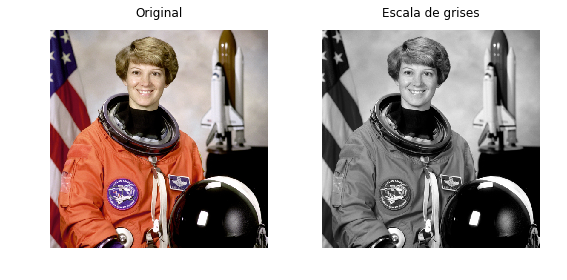

In [5]:
#Se importan los paquetes necesarios
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray

#Se carga la imagen
image=data.astronaut()

#Se pasa la imagen de rgb a escala de grises
gray_image = rgb2gray(image)

#Se grafica el resultado
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(gray_image, cmap=plt.cm.gray)
ax[1].set_title('Escala de grises')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

### Escala de grises a RGB

Se puede representar una imagen en escala de grises en RGB utilizando la función gray2rgb del módulo color.

In [15]:
#Se importan los paquetes necesarios
from skimage import data
from skimage.color import gray2rgb

#Se carga la imagen
image1=data.camera()

#Se pasa la imagen de escala de grises a color
rgb_image=gray2rgb(image1, alpha=None)

## Eliminación del ruido en imágenes

### Utilizando el filtro de medianas

El filtro de medianas es utilizado para eliminar el ruido en las imágenes. Este funciona de la siguiente forma: se visita cada píxel de la imagen y se reempleza por la mediana de los píxeles cercanos. La mediana se calcula ordenando los valores de los píxeles de mayor a menor y eligiendo el que queda en el medio.

Scikit-Image cuenta con el módulo filter, el cual tiene la función median. Para aplicar la función median solo es necesario indicar la imagen a la que se le aplicará y la forma y dimensión del área dentro de la cual se van a tomar en cuenta los vecinos cercanos al píxel, si no se indica es por defecto un cuadrado de tamaño 3.

A continuación se muestra un ejemplo de como aplicar el filtro de medianas, en este caso se utiliza un disco de radio 2 como área para delimitar los vecinos cercanos.

<IPython.core.display.Javascript object>


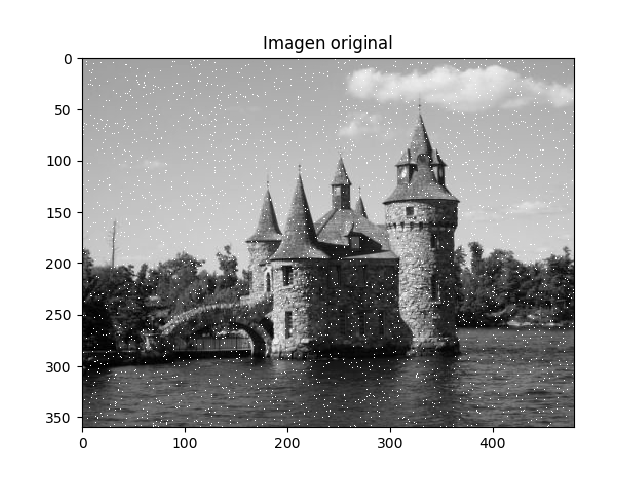

<IPython.core.display.Javascript object>


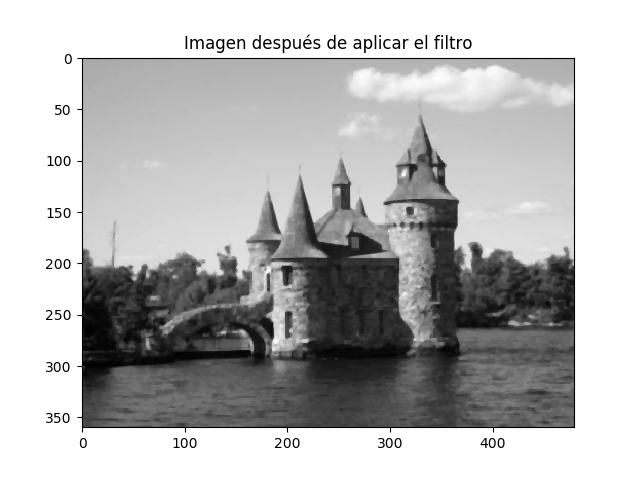

In [16]:
%matplotlib notebook

#Se importan los paquetes necesarios
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import median

#Se lee la imagen
image=io.imread('https://www.safaribooksonline.com/library/view/opencv-2-computer/9781849513241/graphics/3241OS_06_04.jpg') 

#Se grafica la imagen original
plt.figure(1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original')

#Se le aplica el filtro de medianas
med1 = median(image, disk(2))

#Se grafica el resultado
plt.figure(2)
plt.imshow(med1, cmap='gray')
plt.title('Imagen después de aplicar el filtro')

### Utilizando el operador de erosión

El operador de erosión normalmente se aplica a imágenes binarias, pero también puede usarse con imágenes en escala de grises. Basicamente lo que hace es erosionar alrededor de las fronteras de los píxeles del primer plano.

Este operador trabaja con dos entradas, la primera es la imagen que va a hacer erosionada y la segunda conocida como elemento estructural o kernel, la cual se encarga de determinar el efecto preciso de la erosión en la imagen de entrada.

Scikit-Image cuenta con el módulo morphology, el cual permite aplicar el operador erosión por medio de la función erosion, como se muestra en el siguiente código.

<IPython.core.display.Javascript object>


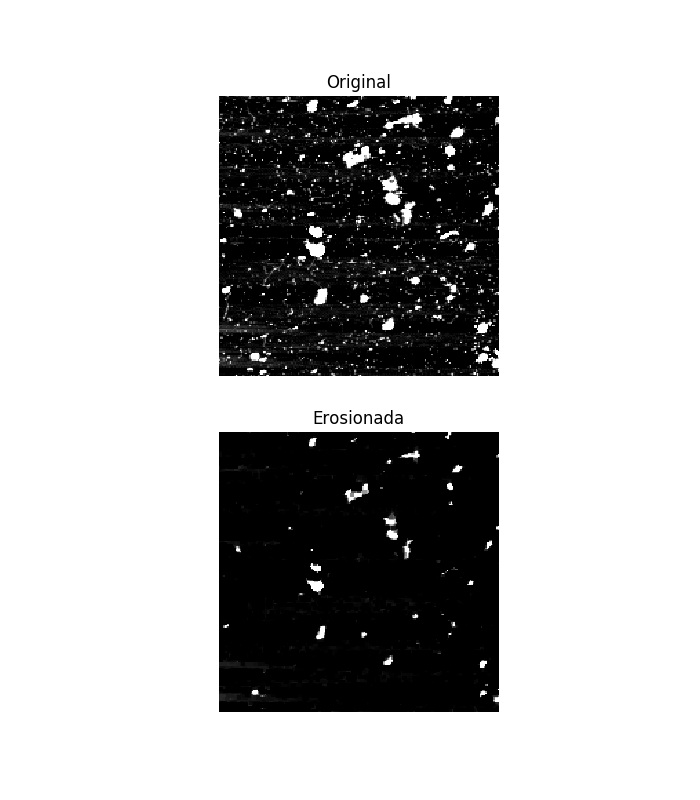

In [17]:
#Se importan los paquetes necesarios
import os
import matplotlib.pyplot as plt
from skimage import io
from skimage.morphology import square 
from skimage.morphology import erosion
from skimage.color import rgb2gray

#Se carga la imagen
filename = os.path.join( os.getcwd(), 'Particulas.TIF')
image1=io.imread(filename)

#Se pasa a escala de grises
image1gray=rgb2gray(image1)

#Se erosiona
img1=erosion(image1gray,square(3))

#Se grafican los resultados
fig, axes = plt.subplots(nrows=2, figsize=(7, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image1gray)
ax[0].set_title('Original')

ax[1].imshow(img1)
ax[1].set_title('Erosionada')

for a in ax:
    a.axis('off')
    
plt.show()

### Ejemplo de aplicación del operador erosión para conteo de partículas en una imagen

En el siguiente código se muestra un ejemplo de como el operador erosión puede utilizarse para contar objetos en una imagen

<IPython.core.display.Javascript object>


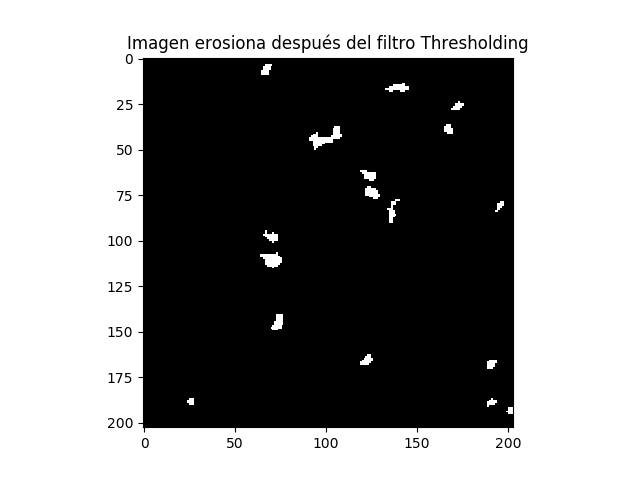

numero de particulas= 17


In [12]:
#Se cargan los paquetes necesarios
%matplotlib notebook
import os
from skimage import io
from skimage import morphology
import matplotlib.pyplot as plt
from skimage.filters import threshold_minimum
from skimage.color import rgb2gray
from skimage.morphology import square 
from skimage.morphology import erosion
from scipy import ndimage

#Se lee la imagen
filename = os.path.join( os.getcwd(), 'Particulas.TIF')
image1=io.imread(filename)

#Se pasa la imagen a escala de grises
image1gray=rgb2gray(image1)

#Se erosiona
img1=erosion(image1gray,square(3))

#Se pasa a binario
thresh = threshold_minimum(img1)
binary = img1 > thresh
    
#Se remueven los elementos pequenos
img0 = morphology.remove_small_objects(binary,13)

#Se cuentan las particulas
labelarray, particle_count = ndimage.measurements.label(img0)

#Se grafican los resultados
plt.figure()
plt.imshow(img0, cmap='gray')
plt.title('Imagen erosiona después del filtro Thresholding')
print('numero de particulas=', particle_count)

Como se puede observar primero se convierte la imagen a escala de grises para poder aplicar el operador erosión. El siguiente paso es contar las partículas por medio de la función ndimage.measurements.label, sin embargo la erosión dejó partículas pequeñas de ruido que deben ser eliminadas utilizando la función morphology.remove_small_objects. Para aplicar la función morphology.remove_small_objects la imagen debe ser binaria, para obtener la imagen binaria se aplica el filtro threshold_mean. 

# 4

# Segmentación

## Thresholding

La umbralización o thresholding es una de las técnicas más simples de segmentación. Consiste en el uso de un valor o umbral para convertir una imagen en escala de grises en una imagen binaria.

Existen diferentes técnicas para calcular el umbral a aplicar a la imagen. Dentro de Scikit-Image se encuentran las siguientes:

- **Threshold_Isodata:** Retorna los valores de umbral basado en el método de ISODATA.

- **Threshold_li:** Retorna los valores de umbral basado en la adaptación del método de la entropía cruzada mínima de Li.

- **Threshold_local:** Calcula una máscara de umbral basada en la vecindad local de píxeles.

- **Threshold_adaptive:** Función obsoleta. Se debe usar el threshold_local en su lugar.

- **Threshold_mean:** Retorna los valores de umbral basandose en el valor promedio de la escala de grises.

- **Threshold_minimun:** Se obtiene el histograma de la imagen y se suaviza hasta obtener solo dos picos máximos. El mínimo entre ellos es el valor de unbral.

- **Threshold_niblack:** El valor de umbral T es calculado para cada pixel de la imagen por medio de la fórmula             T= m(x,y)- ks(x,y), donde m(x,y) y s(x,y) son el promedio y la desviación estandar de un barrio de pixeles (x,y) definido por una ventana rectangular de tamaño w centrada alrededor de un píxel y k es un parámetro variable que tiene peso sobre la desviación estandar.

- **Threshold_otsu:** Retorna los valores basado en el método de Otsu.

- **Threshold_sauvola:** El método de Souvola es una modificación del método de Niblack, donde se modifica la fórmula para calcular el umbral T para cada pixel de la siguiente forma: T = m(x,y) * (1 + k * ((s(x,y) / R) - 1)), siendo R la máxima desviación estándar de la escala de grises de la imagen.

- **Threshold_triangle:** Devuelve un valor de umbral basado en el algoritmo del triángulo.

- **Threshold_yen:** Retorna el valor de umbral basado en el método Yen.

> **Ejemplo del filtro Threshold_minimum**

<IPython.core.display.Javascript object>


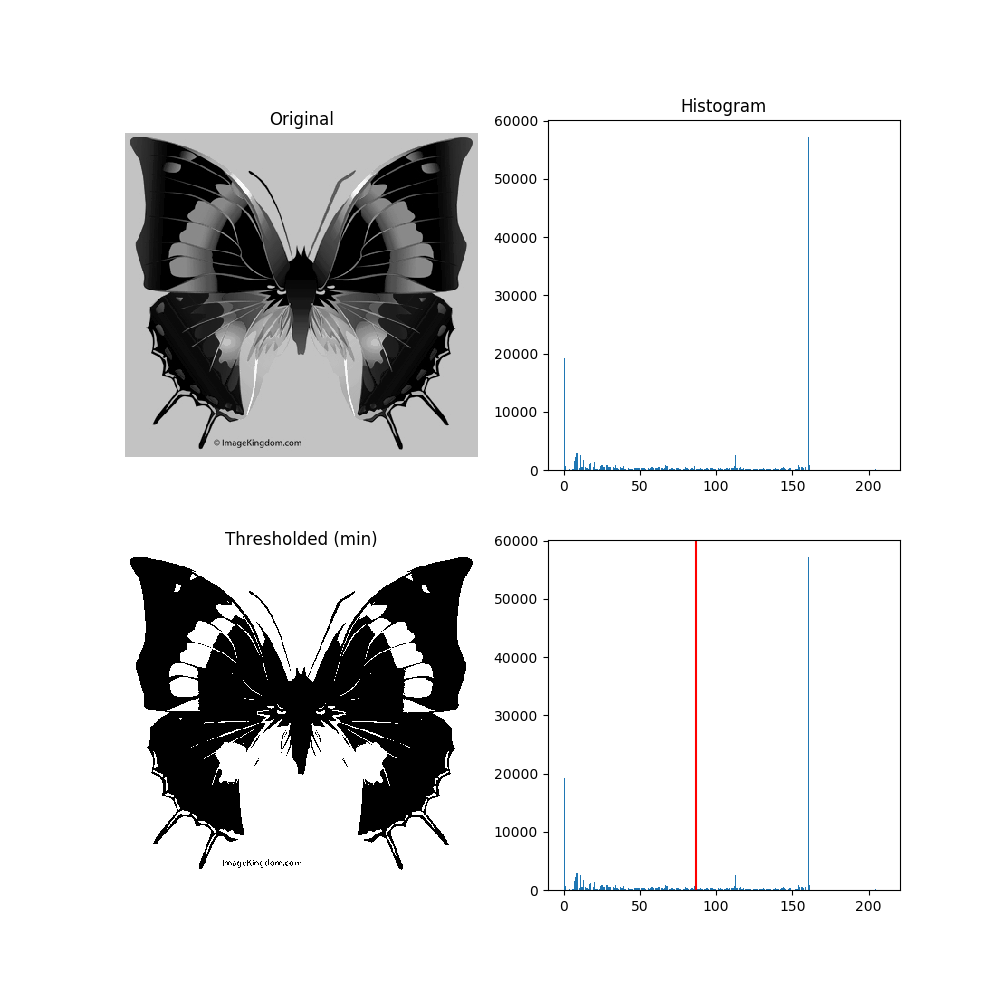

In [19]:
#Se importan los paquetes necesarios 
from skimage import io
from skimage.filters import threshold_minimum
import matplotlib.pyplot as plt

#Se lee la imagen
image=io.imread('http://cadik.posvete.cz/color_to_gray_evaluation/img/butterfly/butterfly_q256.ppm_rasche05_i.jpg')

#Se le aplica el filtro
thresh_min = threshold_minimum(image)
binary_min = image > thresh_min

#Se grafican los resultados
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(image.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary_min, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(image.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

> **Ejemplo del filtro threshold_adaptive**

<IPython.core.display.Javascript object>


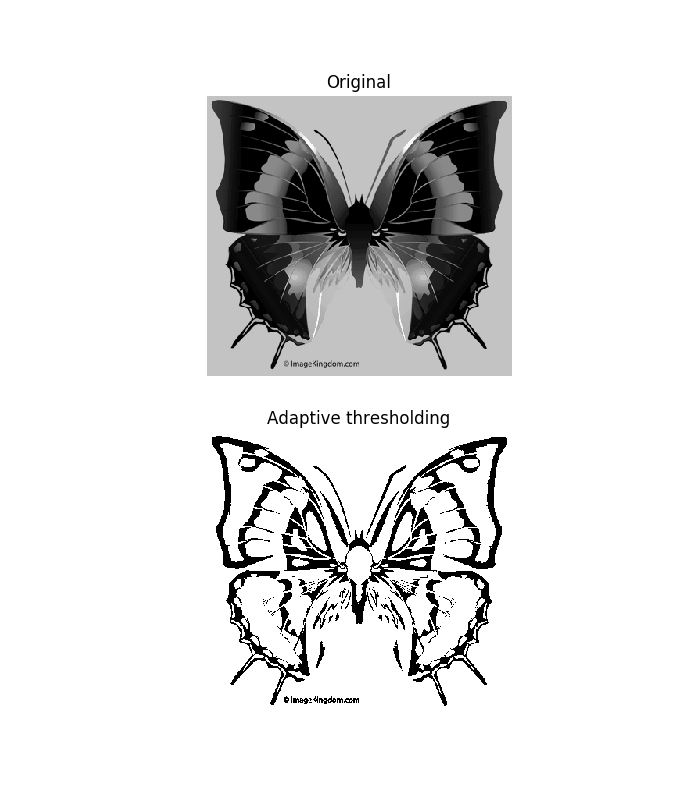

In [20]:
#Se importan los paquetes necesarios 
from skimage import io
from skimage.filters import threshold_otsu, threshold_local
import matplotlib.pyplot as plt

#Se lee la imagen
image2=io.imread('http://cadik.posvete.cz/color_to_gray_evaluation/img/butterfly/butterfly_q256.ppm_rasche05_i.jpg')

#Se aplica el filtro 
block_size = 35
adaptive_thresh = threshold_local(image2, block_size, offset=10)
binary_adaptive = image2 > adaptive_thresh

#Se grafica el resultado
fig, axes = plt.subplots(nrows=2, figsize=(7, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image2)
ax[0].set_title('Original')

ax[1].imshow(binary_adaptive)
ax[1].set_title('Adaptive thresholding')

for a in ax:
    a.axis('off')

plt.show()

> **Evaluación de los filtros threshold**

Debido a que existen muchos tipos de thresholding en algunas ocasiones es complicado determinar cuál aplicará mejor a cierta situación específica. Sin embargo, Scikit-Image cuenta con una una función que permite determinar el mejor algoritmo: try_all_threshold. Basicamente lo que hace la función es aplicar los diferentes filtros a la imagen y graficar los resultados, de manera que visualmente se elija el que mejor se ajusta al resultado que se está buscando.

<IPython.core.display.Javascript object>


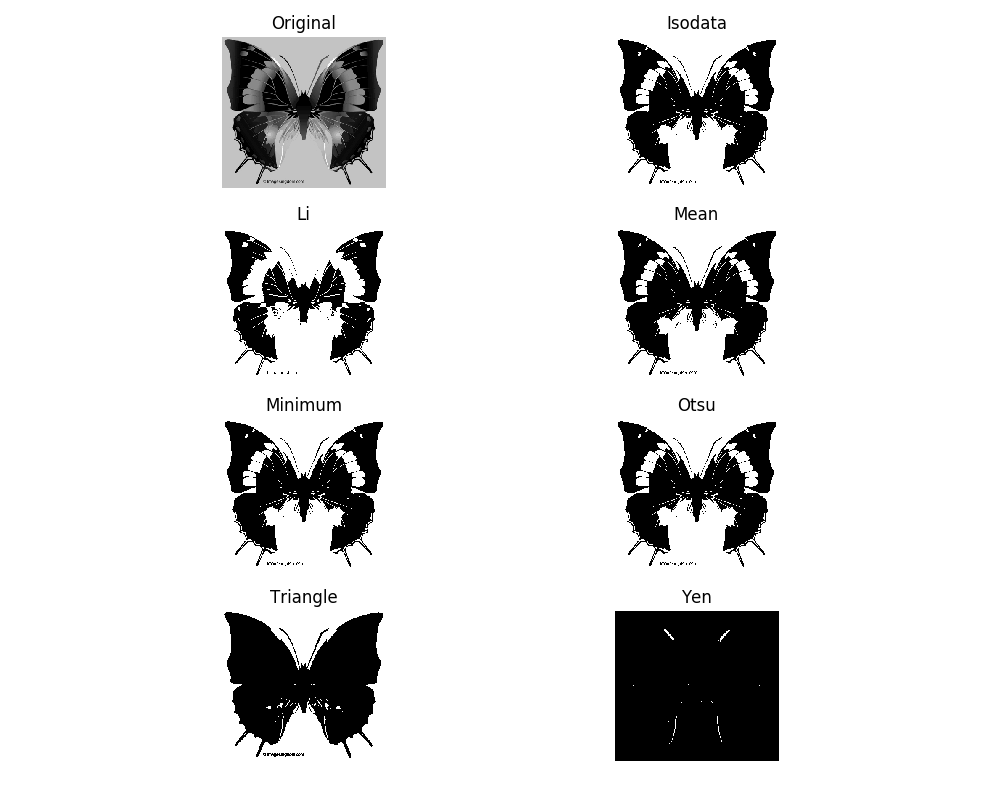

In [21]:
#Se importan los paquetes
from skimage import io
import matplotlib.pyplot as plt
from skimage.filters import try_all_threshold

#Se lee la imagen
image2=io.imread('http://cadik.posvete.cz/color_to_gray_evaluation/img/butterfly/butterfly_q256.ppm_rasche05_i.jpg')

#Se aplica la funcion 
fig, ax = try_all_threshold(image2, figsize=(10, 8), verbose=False)

## Algoritmos de detección de bordes

Los algoritmos de detección de bordes son operadores de diferenciación discreta los cuales aproximan el gradiente de la intensidad de función de una imagen.

La biblioteca Scikit-Image cuenta en su módulo de filtros con los algoritmos de detección de bordes: Filtro de Sobel y Filtro de Roberts. Ambos algoritmos se implementan a continuación sobre una imagen brindada por el LANOTEC.

<IPython.core.display.Javascript object>


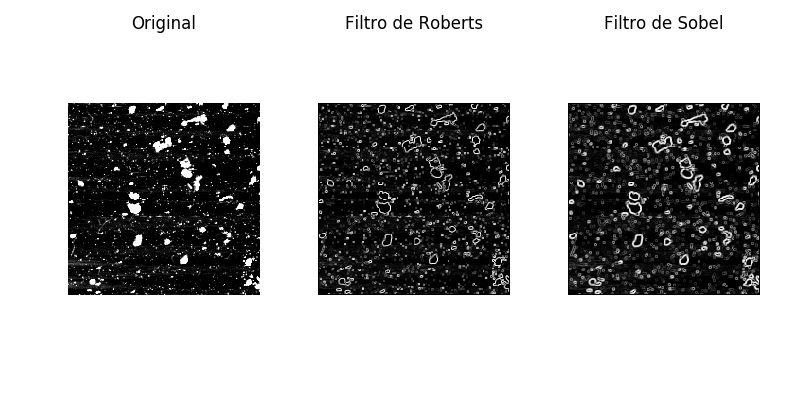

In [22]:
#Se cargan los paquetes necesarios
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import roberts, sobel
from skimage import morphology
from skimage.filters import threshold_isodata
from scipy import ndimage

#Se lee la imagen
image1=io.imread('Particulas.TIF')

#Se convierte la imagen a escala de grises
image=rgb2gray(image1)

#Se aplican los filtros de Sobel y Roberts
edge_roberts = roberts(image)
edge_sobel = sobel(image)

#Grafica de las imagenes con los filtros
fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(image1, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title('Filtro de Roberts')

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Filtro de Sobel')


for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Una vez que se ha aplicado la detección de bordes resulta más sencillo automatizar el proceso de conteo de partículas, para esto se binariza la imagen aplicando un filtro Thresholding, seguidamente se eliminan las objetos más pequeños hasta que quedan unicamente las partículas de interés y finalmente se cuentan las partículas, como se muestra a continuación.

# 5

# Agrupamiento y clasificación

Existe otra biblioteca en Python llamada Scikit-learn qe se orienta al aprendizaje de máquina, incluyendo funciones para realizar clasificaciones, regresiones, agrupamientos, preprocesamiento de datos, búsqueda de modelos y reducción de dimensionalidad.

## Agrupamiento aglomerativo

En realidad son un grupo de algoritmos basados en la misma idea. Para iniciar se asume que cada muestra está en su propio grupo y se usa algún criterio para elegir algún otro grupo y unirlos. El proceso se repite hasta que se tiene un único grupo, obteniendo una jerarquía o un árbol binario. Para unir los grupos la forma más fácil es elegir el grupo más cercano. Una vez que se tiene la jerarquía completa se puede elegir un nivel de esta, lo cual por lo general se especifica con anterioridad.

Para implementar el agrupamiento aglomerativo se cuenta con los siguientes parámetros:

- n_clusters (int): Número de grupos a encontrar. Si no se indica se trabaja con dos.
- connectivity (array-like o callable):  Para encontrar la matriz de conectividad de una matriz se suele utilizar la función image.img_to_graph la cual grafica las gradientes entre las conexiones de pixel a pixel.
- Afinnity (string o callable): Permite indicar la métrica a utilizar para medir la distancia entre grupos, si no se indica se trabaja con a distancia euclidiana.
- compute_full_tre (bool o 'auto'): Permite detener la construcción del árbol en n_clusters.
- linkage= Determina cual distancia usar entre 2 grupos. Las opciones son: 'word' minimiza la varianza de 2 grupos que se han unido, 'average' usa el promedio de las distancias de cada observación de los 2 sets, 'complete' usa la máxima distancia entre 2 observaciones de los 2 sets.

El agoritmo tiene las siguientes salidas:

- labels (array)= Etiqueta para cada una de las muestras.
- n_leaves (int)= Número de hojas del árbol.
- n_components(int)= Número estimado de componentes conectados en la gráfica.

<IPython.core.display.Javascript object>


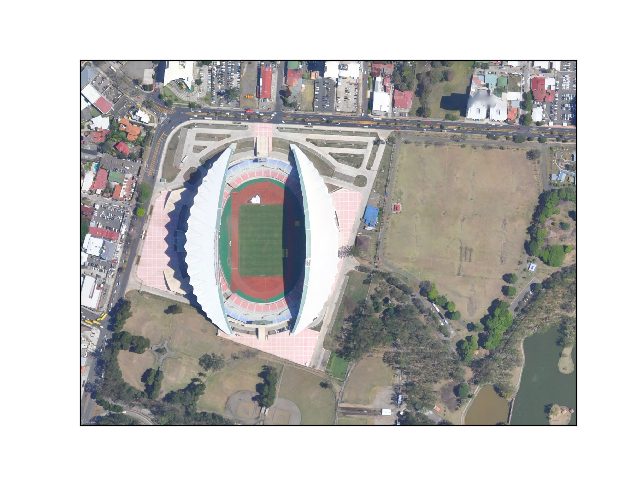

<IPython.core.display.Javascript object>


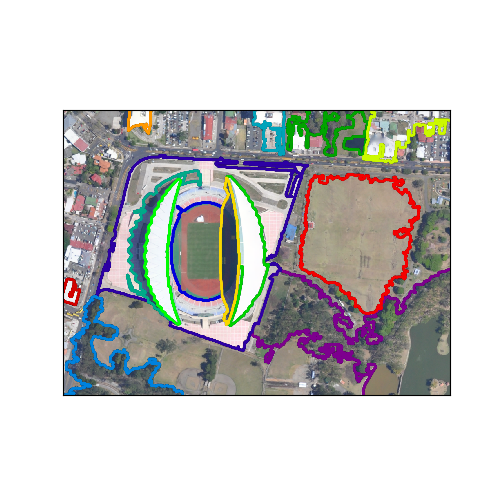

In [24]:
#Se importan los paquetes necesarios
import scipy as sp
import os
from skimage import io
from sklearn.feature_extraction.image import grid_to_graph
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering

#Se lee la imagen
filename=os.path.join(os.getcwd(),'Estadio_Nacional_2.png')
image=io.imread(filename)

#Se muestra la imagen original
plt.figure()
plt.imshow(image)
plt.xticks(())
plt.yticks(())

#Se convierte la imagen a escala de grises
image1=rgb2gray(image)

#Se le da un nuevo tamano a la imagen
image1 = sp.misc.imresize(image1, 50) / 255.
image = sp.misc.imresize(image, 50) / 255.
                        
#Se le da una nueva forma a la imagen
X = np.reshape(image1, (-1, 1))

#Se crea la matriz de conectividad
connectivity = grid_to_graph(*image1.shape)

#Numero de grupos
n_clusters = 15 

#Se aplica el algoritmo
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)
ward.fit(X)                                                                                                                                                                                                         
label = np.reshape(ward.labels_, image1.shape)

#Se grafica el resultado obtenido
h=plt.figure(figsize=(5, 5))
plt.imshow(image, cmap= 'gray')
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()
h.savefig('temp.png', dpi=h.dpi)

## k-Means


Anteiormente se presentó el algoritmo k-Means sin embargo no se explicó a detalle el funcionamiento de éste.
Para realizar la agrupación se realiza el siguiente procedimiento:

1. Si se quieren k grupos se inicializan k centroides tomando k muestras del set de datos. Se mide la distancia de cada muestra con respecto a cada centroide y se asignan al centroide más cercano.
2. Se crean nuevos centroides tomando el valor medio de todas las muestras asignadas a cada uno de los centroides anteriores.
3. Se encuentra la diferencia entre el viejo y el nuevo centroide y se repite el proceso hasta que la diferencia sea mínima.

Si el agoritmo se implementa en la biblioteca de Scikit-learn se cuenta con los siguientes parámetros:

- n_clusters: Número de grupos por generar. Si no se indica se generan ocho.
- max_iter: Número máximo de iteraciones para cada corrida. Si no se indican se realizan 300.
- n_init: Número de veces que conrre con diferente número de centroides. Al final se elige el mejor resultado.
- init: Esta parámetro permite elegir entre tres formas diferentes para inicializar los centroides: 'k-means++' selecciona los centroides de una manera inteligente, 'random' los selecciona de manera aleatoria, 'ndarray' permite que uno indique los centroides.
- tol= Permite indicar la tolerancia relativa para declarar convergencia. Si no se indica se trabaja con una tolerancia de 1e^-4.
- n_jobs= Número de trabajos para que cada uno de los n_init corra en paralelo.

El algoritmo retorna los siguiente:

- cluster_center: Los centroides de cada uno de los grupos.
- Labels: La etiqueta de cada una las muestras.
- inertia: Suma de las distancias de las muestras más cercanas al centroide.

A continuación se muestra un ejemplo de como se puede aplicar este algoritmo utilizando una imagen brindada por el laboratorio PRIAS.

<IPython.core.display.Javascript object>


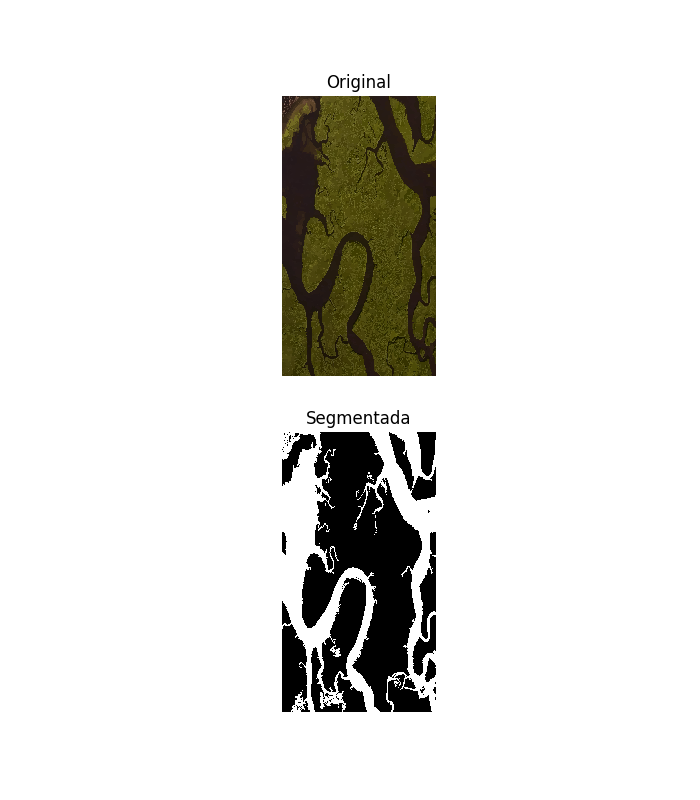

In [25]:
#Se importan los paquetes necesarios
from skimage import io
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from skimage.filters import threshold_mean
from skimage.color import rgb2gray
from skimage import morphology
from skimage.morphology import square 
from skimage.morphology import erosion
from skimage import util 

#Se lee la imagen
filename= os.path.join(os.getcwd(),'PRIAS_1.TIF')
image1=io.imread(filename)

n_colors = 2

#Se recrea la imagen en un arreglo de 2D 
w, h, d = original_shape = tuple(image1.shape)
assert d == 3
image_array = np.reshape(image1, (w * h, d))
image_array_sample = shuffle(image_array, random_state=0)[:1000]

#Se aplica el algoritmo kMeans
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

#Se obtienen las etiquetas
labels = kmeans.predict(image_array)

#Se recrea la imagen con las clases encontradas
def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

#Se pasa la imagen segmentada a escala de grises
image1gray=rgb2gray(recreate_image(kmeans.cluster_centers_, labels, w, h))

#Se erosiona la imagen 
img1=erosion(image1gray,square(2))

#Se pasa a binario 
thresh = threshold_mean(img1)
binary = img1 > thresh

#Se invierte la imagen
inverted_img = util.invert(binary)

#Se remueven las particulas pequenas
img0 = morphology.remove_small_objects(inverted_img,7200)

#Se grafican los resultados
fig, axes = plt.subplots(nrows=2, figsize=(7, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image1)
ax[0].set_title('Original')

ax[1].imshow(img0, cmap='gray')
ax[1].set_title('Segmentada')

for a in ax:
    a.axis('off')
plt.show()